In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def curva_A(jg,D,rho_l,rho_g,sigma):
    jl = 3*jg - 1.15*(((9.81*sigma*(rho_l-rho_g))/(rho_l**2))**(1/4))

    D_crit = 19*(((rho_l-rho_g)*sigma/(9.81*rho_l**2))**(1/2))
    print('Dcrit = ',D_crit)

    if (D<D_crit):
        print('D<Dcrit')
        jl = np.zeros_like(jg)
    
    return jl

In [3]:
def curva_B(jg,D,sigma,rho_l,rho_g,mi_l):
    g = 9.81    
    ni_l = mi_l/rho_l   
    jl = 4*(D**(0.429))*((sigma/rho_l)**(0.089))/(ni_l**(0.072))*(g*(rho_l-rho_g)/rho_l)**(0.446) - jg
    return jl

In [4]:
def curva_E(rho_l,rho_g,sigma):
    g=9.81    
    jg = 3.1*(sigma*g*(rho_l-rho_g))**(1/4)/(rho_g**(1/2))    
    return jg

In [5]:
def curva_D(jg,D,le):
    g = 9.81
    jl = (np.sqrt(g*D))*(le/(40.6*D) - 0.22) - jg 
    return jl

In [6]:
def curva_C(jg):
    jl = 0.923*jg
    return jl

In [7]:
def inter_AB(D,sigma,rho_l,rho_g,mi_l):
    g = 9.81    
    ni_l = mi_l/rho_l
    jg = (1.15/4)*(((g*sigma*(rho_l-rho_g))/(rho_l**2))**(1/4)) + ((D**(0.429))*((sigma/rho_l)**(0.089))/(ni_l**(0.072)))*((g*(rho_l-rho_g)/rho_l)**(0.446))
    return jg

In [8]:
def inter_BC(D,sigma,rho_l,rho_g,mi_l):
    g = 9.81    
    ni_l = mi_l/rho_l    
    jg = 4/1.923*((D**(0.429))*((sigma/rho_l)**(0.089))/(ni_l**(0.072)))*((g*(rho_l-rho_g)/rho_l)**(0.446))
    return jg

In [9]:
def inter1_AD(D,rho_l,rho_g,le):
    A = 1.15*(((9.81*sigma*(rho_l-rho_g))/(rho_l**2))**(1/4))
    B = ((le/(40.6*D) -0.22)*np.sqrt(9.81*D))
    jg = (A + B)/4
    return jg

In [10]:
def inter2_D(D,le):
    g=9.81
    jg = np.sqrt(g*D)*(le/(40.6*D) - 0.22) - 0.01
    return jg

In [11]:
def inter_CD(D,le):
    g=9.81
    jg = (1/1.923)*(np.sqrt(g*D)*(le/(40.6*D) - 0.22))
    return jg

## Caso 1

In [12]:
D = 0.043 #m
P = 1*10**5 #Pa
rho_l = 1800 #kg/m^3
rho_g = 8.41 #kg/m^3
sigma = 0.025 #N/m
mi_l = 0.001 #Pa.s
mi_g = 2*10**(-3) #Pa.s
jg = 4.3 #m/s
jl = 8.4 #m/s

## Caso 2

In [15]:
D = 0.043 #m
P = 1*10**5 #Pa
rho_l = 8100 #kg/m^3
rho_g = 1.48 #kg/m^3
sigma = 0.025 #N/m
mi_l = 0.004 #Pa.s
mi_g = 2*10**(-4) #Pa.s
jg = 3.4 #m/s
jl = 4.8 #m/s

## Caso 3

In [19]:
D = 0.043 #m
P = 1*10**5 #Pa
rho_l = 1800 #kg/m^3
rho_g = 4.81 #kg/m^3
sigma = 0.025 #N/m
mi_l = 0.008 #Pa.s
mi_g = 2*10**(-3) #Pa.s
jg = 3.8 #m/s
jl = 3.4 #m/s

## Caso 4

In [24]:
D = 0.043 #m
P = 1*10**5 #Pa
rho_l = 8100 #kg/m^3
rho_g = 8.14 #kg/m^3
sigma = 0.025 #N/m
mi_l = 0.003 #Pa.s
mi_g = 2*10**(-8) #Pa.s
jg = 8.3 #m/s
jl = 4.3 #m/s

In [25]:
x_ab = inter_AB(D,sigma,rho_l,rho_g,mi_l)
x_bc = inter_BC(D,sigma,rho_l,rho_g,mi_l)
x_ce = curva_E(rho_l,rho_g,sigma)

x_min = 0.01
x_max = 100
y_min = 0.01
y_max = 100

xA = np.linspace(x_min,x_ab,10**4)
yA = curva_A(xA,D,rho_l,rho_g,sigma)

xB = np.linspace(x_min,x_bc,10**4)
yB = curva_B(xB,D,sigma,rho_l,rho_g,mi_l)

xC = np.linspace(x_bc,x_ce,10**4)
yC = curva_C(xC)

leD2 = 40.6*((jl+jg)/(9.81*D)**(0.5) + 0.22)
le2 = leD2*D

le = 4
leD = le/D

x1_d = inter1_AD(D,rho_l,rho_g,le)
'''x1_d = inter_CD(D,le)'''
x2_d = inter2_D(D,le)
xd = np.linspace(x1_d,x2_d,10**4)
yd = curva_D(xd,D,le)

yE = np.linspace(0.01,100,10**4)
xE = np.ones_like(xA)
xE = xE*curva_E(rho_l,rho_g,sigma)



Dcrit =  0.010651928996568711


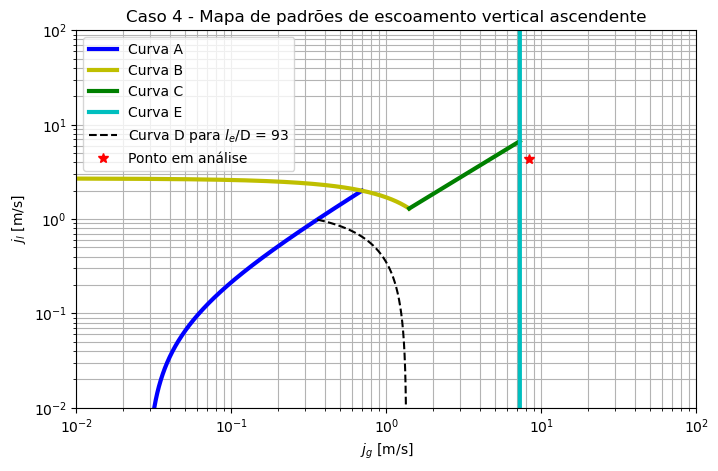

In [26]:
plt.figure(figsize=(8,5), dpi=100)
plt.loglog(xA,yA,'b', label='Curva A',linewidth=3.0)
plt.loglog(xB,yB,'y', label='Curva B',linewidth=3.0)
plt.loglog(xC,yC,'g', label='Curva C',linewidth=3.0)
plt.loglog(xE,yE,'c', label='Curva E',linewidth=3.0)
plt.loglog(xd,yd,'--k',label='Curva D para $l_e$/D = ' + str(round(leD)))
plt.loglog(jg,jl,'r*',markersize=7, label='Ponto em análise')

plt.title('Caso 4 - Mapa de padrões de escoamento vertical ascendente')
plt.xlabel('$j_g$ [m/s]')


plt.ylabel('$j_l$ [m/s]')
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.legend()
plt.grid(b=True, which='both', color='0.7', linestyle='-')
